# Pandas
Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [1]:
import pandas as pd
import numpy as np
import os

## 1. Data Types
### 1.1 Numpy Array
A Numpy array is a 1 row array.

In [2]:
np.random.rand(3)
np.array([1,2,3])

array([1, 2, 3])

### 1.2 Series
Series is a one-dimensional labeled array (column) capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.  [Panda Series Documentation][1]

The basic method to create a Series is to call:

[1]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html> "Pandas Series" 

In [3]:
pd.Series({'a1': 2, 'a2': 'b'}) # Using Dictionary
pd.Series([1, 'b'], index=['a1', 'a2']) # Using List of values and list index
pd.Series(5.1, index=['a', 'b', 'c']) # Using scalar

a    5.1
b    5.1
c    5.1
dtype: float64

#### 1.2.1 Slicing 
A series can be sliced

In [4]:
pd.Series([1,2,3], index=['a', 'b', 'c'])[0:2]

a    1
b    2
dtype: int64

As the series is indexed, it also behaves like a dictionary

In [5]:
pd.Series([1,2,3], index=['a', 'b', 'c'])['b']
pd.Series([1,2,3], index=['a', 'b', 'c']).get('d', np.NaN)
pd.Series([1,2,3], index=['a', 'b', 'c']).get('b')

2

#### 1.2.2 Basic Operations
Basic operations can be done in series without the need of iterating through each element. This operations allow both for using scalars as well as another series.
* Additions of a series with an scalar or another series
* Multiplication of a series with an scalar or another series

In [6]:
# Additions
pd.Series([1,2,3], index=['a', 'b', 'c']) + pd.Series([1,2,3,5], index=['a', 'b', 'c', 'd'])

a    2.0
b    4.0
c    6.0
d    NaN
dtype: float64

In [7]:
# Multiplication 
pd.Series([1,2,3], index=['a', 'b', 'c']) * pd.Series([1,2,3], index=['a', 'b', 'c'])

a    1
b    4
c    9
dtype: int64

### 1.3 Pandas DataFrame
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, 

DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

[DataFrame Documentation][1]

[1]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html> "Pandas DataFrame"


In [8]:
# Union of 2 dict of Series 
d = {
    'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])
}
pd.DataFrame(d)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [9]:
# Union of 2 Dict of dicts
d = {
    'one': {'a':1, 'b':2}, 
    'two': {'a':1, 'c':'d'}
}
pd.DataFrame(d)

,one,two
a,1.0,1
b,2.0,NaN
c,NaN,d


## 2. Getting data
Data can be obtained by using built-in functions such as:
* `pd.read_csv()`
* `pd_read_excel()`
* `pd_read_sql`

[IO documentation][1]  

[1]: <https://pandas.pydata.org/pandas-docs/stable/reference/io.html>

In [10]:
players_df = pd.read_csv('./data/Master.csv')
# columns_to_use = ['id', 'title', 'artist', 'medium']
'''
df_sample_c =pd.read_csv(os.path.join('.', 'collection-master', 'artwork_data.csv'), 
    nrows=5, index_col='id', usecols=columns_to_use)
'''
players_df.head(2)

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Getting basic information
### 3.1 Basic info dataframe
* **Shape** gives the number of rows x columns in a tuple [Shape Documentation][1]
* **Info** gives detailed info on each label [Info Documentation][2]  
* **Describe** gives basic statistics on numeric columns, or all columns if `include='all' `  [Describe Documentation][3]
* **nUnique** gives the number of unique records per column [nUnique Docs][4]

[1]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html> "Shape Documentation"
[2]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html> "Info Documentation"
[3]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html> "Describe Documentation"
[4]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html> "N unique Documentation"

In [11]:
players_df.shape

(7761, 31)

In [12]:
players_df.describe()

,height,weight,ihdbID,firstNHL,lastNHL,firstWHA,lastWHA,birthYear,birthMon,birthDay,deathYear,deathMon,deathDay
count,7334.000000,7336.000000,7125.000000,6851.000000,6851.000000,903.000000,903.000000,7543.000000,7506.000000,7504.000000,1320.000000,1173.000000,1168.000000
mean,71.904418,189.503953,18159.395930,1979.898555,1985.173551,1974.256921,1975.746401,1955.170091,6.056088,15.605144,2547.587121,6.670929,15.244863
std,2.328650,18.341611,22852.778006,24.150092,24.359206,2.123774,1.947460,26.379075,3.434267,8.917103,2052.311223,3.484605,8.601029
min,63.000000,125.000000,45.000000,1917.000000,1917.000000,1972.000000,1972.000000,1841.000000,1.000000,1.000000,1907.000000,1.000000,1.000000
25%,70.000000,178.000000,3339.000000,1968.000000,1974.000000,1972.000000,1974.000000,1943.000000,3.000000,8.000000,1970.000000,4.000000,8.000000
50%,72.000000,190.000000,7500.000000,1985.000000,1991.000000,1974.000000,1976.000000,1961.000000,6.000000,15.000000,1989.000000,7.000000,15.000000
75%,73.000000,200.000000,23463.000000,1999.000000,2006.000000,1976.000000,1978.000000,1975.000000,9.000000,23.000000,2002.000000,10.000000,23.000000
max,81.000000,265.000000,118280.000000,2011.000000,2011.000000,1978.000000,1978.000000,1993.000000,12.000000,31.000000,9999.000000,12.000000,31.000000


In [13]:
players_df.nunique().head()

playerID     7520
coachID       395
hofID         366
firstName    1241
lastName     5075
dtype: int64

### 3.2 Get basic info on a label

Obtain unique values per label
* Get unique values
* Count unique values
* Get statistics on a numeric column use `describe` on that column
* Get statistics values of other cols grouped by that column

In [14]:
len(players_df['pos'].unique())	

19

Count of unique per column (alternative to `nunique`)

In [15]:
players_df.groupby('pos').size()

pos
C      1605
C/D       3
C/L       2
C/R       2
D      2218
D/C       1
D/L       2
D/R       1
F        43
G       761
L      1450
L/C       2
L/D       1
R      1348
R/C       5
R/D       1
R/L       1
W         1
dtype: int64

In [16]:
players_df['height'].describe()

count    7334.000000
mean       71.904418
std         2.328650
min        63.000000
25%        70.000000
50%        72.000000
75%        73.000000
max        81.000000
Name: height, dtype: float64

## 4. Indexing and Filtering
### 4.1 Drop Records
#### 4.1.1 Based on a condition

* Using boolean condition either with [], or loc filtering

In [17]:
players_df_trim_df = players_df.loc[players_df['lastNHL']>=1980]
players_df_trim_df.shape

(4627, 31)

In [18]:
players_df_trim_df[players_df_trim_df['birthDay']==4].head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
37,afinoma01,NaN,NaN,Maxim,Afinogenov,NaN,Maxim Sergeyevich,NaN,72.0,191.0,...,4.0,Russia,NaN,Moscow,NaN,NaN,NaN,NaN,NaN,NaN
53,aivazmi01,NaN,NaN,Micah,Aivazoff,NaN,Micah,NaN,72.0,195.0,...,4.0,Canada,BC,Powell River,NaN,NaN,NaN,NaN,NaN,NaN
79,allisra01,NaN,NaN,Ray,Allison,NaN,Raymond Peter,NaN,70.0,195.0,...,4.0,Canada,BC,Cranbrook,NaN,NaN,NaN,NaN,NaN,NaN
164,artyuev01,NaN,NaN,Evgeny,Artyukhin,NaN,NaN,NaN,77.0,254.0,...,4.0,Russia,NaN,Moscow,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
players_df_trim_df = players_df.loc[players_df['lastNHL']>=1980]
players_df_trim_df.shape

(4627, 31)

#### 4.1.2 DropNA

In [20]:
# records
orig_players_df = players_df_trim_df.copy()
players_df_trim_df = players_df_trim_df.dropna(subset=['playerID'])
players_df_trim_df.shape

(4627, 31)

In [21]:
# how determines only removing those where both are NA
players_df = players_df.dropna(subset=['firstNHL', 'lastNHL'], how='all')
players_df.shape

(6851, 31)

### 4.3 Drop columns
There are multiple ways to drop columns:
* By selecting the columns to drop with the [Drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function
* By filtering the columns to retain:
    * Using simple selection syntax, `df = df[[columns_to_keep]]` or `df=df.loc[:, [columns_to_keep]]`
    * use [filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html) 

In [22]:
players_df.drop(columns='birthDay', axis=1, inplace=True, errors='ignore')

### 4.4 Record Selection
#### 4.4.1 Iloc
Integer location `iloc` allows to query by row number. [Iloc Documentation][1]

[1]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html>  "Iloc Documentation"

In [23]:
players_df_trim_df.iloc[0:3]

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
4,abdelju01,NaN,NaN,Justin,Abdelkader,NaN,NaN,NaN,73.0,195.0,...,25.0,USA,MI,Muskegon,NaN,NaN,NaN,NaN,NaN,NaN
9,abidra01,NaN,NaN,Ramzi,Abid,NaN,NaN,NaN,74.0,210.0,...,24.0,Canada,QC,Montreal,NaN,NaN,NaN,NaN,NaN,NaN


or using a boolean array (`df.values` returns array)

In [24]:
players_df_trim_df.iloc[(players_df_trim_df['birthYear']>1990).values].head()

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
174,ashtoca01,NaN,NaN,Carter,Ashton,NaN,NaN,NaN,75.0,215.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234,baertsv01,NaN,NaN,Sven,Baertschi,NaN,NaN,NaN,70.0,181.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,barrity01,NaN,NaN,Tyson,Barrie,NaN,NaN,NaN,70.0,190.0,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
885,bulmebr01,NaN,NaN,Brett,Bulmer,NaN,NaN,NaN,75.0,185.0,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
900,burmial01,NaN,NaN,Alexander,Burmistrov,NaN,NaN,NaN,71.0,170.0,...,21.0,Russia,NaN,Kazan,NaN,NaN,NaN,NaN,NaN,NaN


#### LOC
location is used to:
* filter by the index
* or using a boolean array... the later can be used to get reduce the df

In [25]:
players_df_trim_df.loc[1106]

playerID        charazd01
coachID               NaN
hofID                 NaN
firstName           Zdeno
lastName            Chara
nameNote              NaN
nameGiven           Zdeno
nameNick            Big Z
height                 81
weight                255
shootCatch              L
legendsID           11560
ihdbID              28487
hrefID          charazd01
firstNHL             1997
lastNHL              2011
firstWHA              NaN
lastWHA               NaN
pos                     D
birthYear            1977
birthMon                3
birthDay               18
birthCountry     Slovakia
birthState            NaN
birthCity         Trencin
deathYear             NaN
deathMon              NaN
deathDay              NaN
deathCountry          NaN
deathState            NaN
deathCity             NaN
Name: 1106, dtype: object

In [26]:
players_df_trim_df.loc[(players_df['birthYear']>1992), ['playerID', 'birthYear']] 

,playerID,birthYear
5234,nugenry01,1993.0
6280,scheima01,1993.0
7737,zibanmi01,1993.0


In [27]:
players_df_trim_df = players_df_trim_df.filter(regex='(playerID|pos|^birth)|(Name$)', axis=1)
list(players_df_trim_df.columns)

['playerID',
 'firstName',
 'lastName',
 'pos',
 'birthYear',
 'birthMon',
 'birthDay',
 'birthCountry',
 'birthState',
 'birthCity']

### Pipe
Applies formula to df

In [28]:
players_df_trim_df['birthYear'].pipe(lambda a : a > 1985).value_counts()

False    4061
True      566
Name: birthYear, dtype: int64

In [29]:
def mem_mib(df):
    print('{0:,.2f} MiB'.format(df.memory_usage().sum()/1024**2))

In [30]:
mem_mib(players_df)

mem_mib(players_df_trim_df)

1.93 MiB
0.54 MiB


## Categories

In [31]:
players_df_trim_df.loc[:, 'pos']= pd.Categorical(players_df_trim_df['pos'])

In [32]:
players_df_trim_df.loc[:,'pos'].cat.categories

Index(['C', 'D', 'F', 'G', 'L', 'L/C', 'R'], dtype='object')

In [33]:
players_df_trim_df.loc[:, 'birthCountry']= pd.Categorical(players_df_trim_df['birthCountry'])
players_df_trim_df.loc[:, 'birthState']= pd.Categorical(players_df_trim_df['birthState'])

In [34]:
players_df_trim_df.loc[players_df_trim_df['birthCountry']=='Canada'].describe()

,birthYear,birthMon,birthDay
count,2750.000000,2750.000000,2750.000000
mean,1969.776000,5.819273,15.597091
std,10.771039,3.370813,8.924557
min,1940.000000,1.000000,1.000000
25%,1961.000000,3.000000,8.000000
50%,1969.000000,5.000000,15.000000
75%,1979.000000,9.000000,23.000000
max,1992.000000,12.000000,31.000000


In [35]:
players_df_trim_df.loc[:, 'birthCountry'].value_counts().head(2)

Canada    2750
USA        773
Name: birthCountry, dtype: int64

## Change index

In [36]:
players_df_trim_df = players_df_trim_df.set_index('playerID')

<https://mkaz.blog/code/python-string-format-cookbook/>

# Scores

In [37]:
score_df = pd.read_csv('./data/Scoring.csv')
score_df.head()

,playerID,year,stint,tmID,lgID,pos,GP,G,A,Pts,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,1997,1,ANA,NHL,C,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,1998,1,ANA,NHL,C,73.0,3.0,5.0,8.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,1999,1,ANA,NHL,C,63.0,7.0,11.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,2000,1,ANA,NHL,C,12.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,1975,1,CIN,WHA,D,17.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
score_df = score_df.loc[(score_df["lgID"]=='NHL')&(score_df['year']>=1980)]

In [39]:
score_df = score_df.filter(regex='^(?!(Post|PP|SH)).*')
score_df['tmID'] = pd.Categorical(score_df['tmID'])
score_df =score_df.loc[:,['playerID', 'year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG']]
score_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28616 entries, 0 to 45966
Data columns (total 8 columns):
playerID    28616 non-null object
year        28616 non-null int64
tmID        28616 non-null category
GP          28508 non-null float64
G           28508 non-null float64
A           28508 non-null float64
Pts         28508 non-null float64
SOG         28508 non-null float64
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 1.8+ MB


In [40]:
score_df.index

Int64Index([    0,     1,     2,     3,     7,     8,     9,    10,    11,
               38,
            ...
            45957, 45958, 45959, 45960, 45961, 45962, 45963, 45964, 45965,
            45966],
           dtype='int64', length=28616)

reset index, restarts the index to be a sequence.

In [41]:
score_df.reset_index(drop=True, inplace=True)

In [42]:
teams_df = pd.read_csv('./data/Teams.csv')

In [43]:
def recent_nhl(df):
    return df[(df['lgID']=='NHL')&(df['year']>1980)]


In [44]:
teams_df = recent_nhl(teams_df)

In [45]:
teams_df = teams_df[['year', 'tmID', 'name']]

In [46]:
teams_df.nunique()

year    30
tmID    37
name    37
dtype: int64

In [47]:
teams_split_df = pd.read_csv('./data/TeamSplits.csv')

In [48]:
teams_split_df = recent_nhl(teams_split_df)

In [49]:
teams_split_df.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [50]:
teams_split_df.columns[3:11]
teams_split_df.drop(columns=teams_split_df.columns[3:11], inplace=True)

In [51]:
teams_split_df.drop(columns=['lgID'], inplace=True)

In [52]:
teams_split_df['tmID'] = pd.Categorical(teams_split_df['tmID'])

In [53]:
players_df_trim_df.head(2)

,firstName,lastName,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity
playerID,,,,,,,,,
aaltoan01,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta
abdelju01,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon


In [54]:
score_df.head(2)

,playerID,year,tmID,GP,G,A,Pts,SOG
0,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0


In [55]:
score_df = pd.merge(score_df, players_df_trim_df, how='left', left_on='playerID', right_index=True)

In [56]:
three_years = score_df.loc[
    (score_df['year']>2000) 
    & (score_df['year']<2004)]

In [57]:
three_years = three_years.drop_duplicates(subset=['playerID', 'year'])
three_years.shape

(2957, 17)

In [58]:
counts = three_years['playerID'].value_counts()
ids = counts[counts ==3].sample(5).index

In [59]:
df3 = three_years.loc[three_years['playerID'].isin(ids)]

In [60]:
basic_df3 = df3.loc[:, ['playerID', 'year', 'G']]

### Melt and Pivot
Pivot allows to convert a long Dataframe into a wider df based on a column (or index). [Docs][1]
Melt does the opposite, converts a wide df into a long one

[1]:<https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html>

In [61]:
basic_df3.head()

,playerID,year,G
1691,bettsbl01,2001,1.0
1692,bettsbl01,2002,1.0
1693,bettsbl01,2003,1.0
7671,forsbpe01,2001,NaN
7672,forsbpe01,2002,29.0


In [62]:
pivot = basic_df3.pivot(index='playerID', columns='year', values='G')
pivot.head()

year,2001,2002,2003
playerID,,,
bettsbl01,1.0,1.0,1.0
forsbpe01,NaN,29.0,18.0
kubafi01,5.0,8.0,5.0
passmst01,0.0,0.0,0.0
schnaro01,0.0,0.0,0.0


In [63]:
pivot.reset_index(inplace=True) ## As melt does not use the index
pivot.melt(id_vars='playerID', value_vars=[2001, 2002, 2003], value_name='G').head()

,playerID,year,G
0,bettsbl01,2001,1.0
1,forsbpe01,2001,NaN
2,kubafi01,2001,5.0
3,passmst01,2001,0.0
4,schnaro01,2001,0.0


In [64]:
score_df = pd.merge(left=score_df, right=players_df[['playerID', 'firstName', 'lastName']], on='playerID')
score_df = score_df.set_index('playerID')

## Multi-index
Pandas allows for multi index <https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html>
This multiple indexes allows for some complex calculations, like obtaining the player that scored the most on each year
Grouping allows for a quick method to determine

In [65]:
# Obtain the max per player and year
score_df.groupby(['playerID', 'year'])['G'].max().head()

playerID   year
aaltoan01  1997    0.0
           1998    3.0
           1999    7.0
           2000    1.0
abdelju01  2007    0.0
Name: G, dtype: float64

In [66]:
mi = score_df.reset_index().set_index(['playerID', 'year'])
# Obtain the index of the max Goal per year
mi.groupby(level='year')['G'].idxmax().head()

year
1980    (bossymi01, 1980)
1981    (gretzwa01, 1981)
1982    (gretzwa01, 1982)
1983    (gretzwa01, 1983)
1984    (gretzwa01, 1984)
Name: G, dtype: object

In [67]:
# Query one record
mi.loc[('gretzwa01', 1981)]

,,tmID,GP,G,A,Pts,SOG,firstName_x,lastName_x,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,firstName_y,lastName_y
playerID,year,,,,,,,,,,,,,,,,,
gretzwa01,1981,EDM,80.0,92.0,120.0,212.0,369.0,Wayne,Gretzky,C,1961.0,1.0,26.0,Canada,ON,Brantford,Wayne,Gretzky


In [68]:
# Slicing multiple records (they need to be sorted first)
idx = pd.IndexSlice
mi2 = mi.sort_index()
mi2.loc[idx[:, 1997:1998], :].head() # obtain all records from 1997 to 1998

tmID    GP     G     A   Pts    SOG firstName_x lastName_x pos  \
playerID  year                                                                  
aaltoan01 1997  ANA   3.0   0.0   0.0   0.0    1.0       Antti      Aalto   C   
          1998  ANA  73.0   3.0   5.0   8.0   61.0       Antti      Aalto   C   
adamsgr02 1997  DAL  49.0  14.0  18.0  32.0   75.0        Greg      Adams   L   
          1998  PHO  75.0  19.0  24.0  43.0  176.0        Greg      Adams   L   
adamske01 1997  TOR   5.0   0.0   0.0   0.0    3.0       Kevyn      Adams   C   

                birthYear  birthMon  birthDay birthCountry birthState  \
playerID  year                                                          
aaltoan01 1997     1975.0       3.0       4.0      Finland        NaN   
          1998     1975.0       3.0       4.0      Finland        NaN   
adamsgr02 1997     1963.0       8.0      15.0       Canada         BC   
          1998     1963.0       8.0      15.0       Canada         BC   
adamske01 1997     1974.0      10.0       8.0          USA         DC   

                   birthCity firstName_y lastName_y  
playerID  year                                       
aaltoan01 1997  Lappeenranta       Antti      Aalto  
          1998  Lappeenranta       Antti      Aalto  
adamsgr02 1997        Nelson        Greg      Adams  
          1998        Nelson        Greg      Adams  
adamske01 1997    Washington       Kevyn      Adams

In [69]:
mi2.loc[idx['aaltoan01':'adamsgr02', 1997:1998], :].head() # obtain all records from 1997 to 1998 for players from aaltoan01 to 'adamsgr02'

tmID    GP     G     A   Pts    SOG firstName_x lastName_x pos  \
playerID  year                                                                  
aaltoan01 1997  ANA   3.0   0.0   0.0   0.0    1.0       Antti      Aalto   C   
          1998  ANA  73.0   3.0   5.0   8.0   61.0       Antti      Aalto   C   
adamsgr02 1997  DAL  49.0  14.0  18.0  32.0   75.0        Greg      Adams   L   
          1998  PHO  75.0  19.0  24.0  43.0  176.0        Greg      Adams   L   

                birthYear  birthMon  birthDay birthCountry birthState  \
playerID  year                                                          
aaltoan01 1997     1975.0       3.0       4.0      Finland        NaN   
          1998     1975.0       3.0       4.0      Finland        NaN   
adamsgr02 1997     1963.0       8.0      15.0       Canada         BC   
          1998     1963.0       8.0      15.0       Canada         BC   

                   birthCity firstName_y lastName_y  
playerID  year                                       
aaltoan01 1997  Lappeenranta       Antti      Aalto  
          1998  Lappeenranta       Antti      Aalto  
adamsgr02 1997        Nelson        Greg      Adams  
          1998        Nelson        Greg      Adams

In [70]:
mi.index.names

FrozenList(['playerID', 'year'])

In [71]:
# change level of the idx
mi.swaplevel().head()

,,tmID,GP,G,A,Pts,SOG,firstName_x,lastName_x,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,firstName_y,lastName_y
year,playerID,,,,,,,,,,,,,,,,,
1997,aaltoan01,ANA,3.0,0.0,0.0,0.0,1.0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,Antti,Aalto
1998,aaltoan01,ANA,73.0,3.0,5.0,8.0,61.0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,Antti,Aalto
1999,aaltoan01,ANA,63.0,7.0,11.0,18.0,102.0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,Antti,Aalto
2000,aaltoan01,ANA,12.0,1.0,1.0,2.0,18.0,Antti,Aalto,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,Antti,Aalto
2007,abdelju01,DET,2.0,0.0,0.0,0.0,6.0,Justin,Abdelkader,L,1987.0,2.0,25.0,USA,MI,Muskegon,Justin,Abdelkader


In [72]:
mi.index.nlevels

2

In [73]:
teams_split_df = teams_split_df.set_index(['year', 'tmID'])

In [74]:
teams_split_df.head()

SepW  SepL  SepT  SepOL  OctW  OctL  OctT  OctOL  NovW  NovL  ...  \
year tmID                                                                ...   
1981 BOS    NaN   NaN   NaN    NaN   6.0   2.0   3.0    NaN   7.0   5.0  ...   
     BUF    NaN   NaN   NaN    NaN   5.0   3.0   3.0    NaN   7.0   2.0  ...   
     CAL    NaN   NaN   NaN    NaN   2.0   7.0   2.0    NaN   5.0   5.0  ...   
     CHI    NaN   NaN   NaN    NaN   3.0   3.0   5.0    NaN   6.0   4.0  ...   
     COR    NaN   NaN   NaN    NaN   2.0   7.0   2.0    NaN   1.0  10.0  ...   

           FebT  FebOL  MarW  MarL  MarT  MarOL  AprW  AprL  AprT  AprOL  
year tmID                                                                 
1981 BOS    1.0    NaN   7.0   5.0   2.0    NaN   2.0   1.0   0.0    NaN  
     BUF    3.0    NaN   5.0   6.0   3.0    NaN   1.0   1.0   0.0    NaN  
     CAL    3.0    NaN   5.0   6.0   2.0    NaN   1.0   1.0   0.0    NaN  
     CHI    0.0    NaN   5.0   6.0   2.0    NaN   2.0   0.0   0.0    NaN  
     COR    3.0    NaN   3.0   8.0   2.0    NaN   1.0   1.0   0.0    NaN  

[5 rows x 32 columns]

In [75]:
months = teams_split_df.columns.map(lambda x: x[:3])
metrics =  teams_split_df.columns.map(lambda x: x[3:])

In [76]:
midx = pd.MultiIndex.from_arrays([months, metrics])
midx

MultiIndex(levels=[['Apr', 'Dec', 'Feb', 'Jan', 'Mar', 'Nov', 'Oct', 'Sep'], ['L', 'OL', 'T', 'W']],
           codes=[[7, 7, 7, 7, 6, 6, 6, 6, 5, 5, 5, 5, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 4, 4, 4, 4, 0, 0, 0, 0], [3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1, 3, 0, 2, 1]])

# Time series

In [77]:
ts = pd.Timestamp('1997-03-04 14:25:54')

In [78]:
ts.year

1997

In [79]:
ts.day_name()

'Tuesday'

In [80]:
tp = pd.Period('2Q2010', 'Q')

In [81]:
tp.weekofyear

26

In [83]:
players_df_trim_df_copy = players_df_trim_df.copy()


In [84]:
players_df_trim_df = players_df_trim_df.assign(birthdate = pd.to_datetime({
    'year': players_df_trim_df.birthYear,
    'month': players_df_trim_df.birthMon,
    'day': players_df_trim_df.birthDay
}))
players_df_trim_df.drop(columns=['birthYear', 'birthMon', 'birthDay'], inplace=True)

In [86]:
players_df_trim_df.head(2)

,firstName,lastName,pos,birthCountry,birthState,birthCity,birthdate
playerID,,,,,,,
aaltoan01,Antti,Aalto,C,Finland,NaN,Lappeenranta,1975-03-04
abdelju01,Justin,Abdelkader,L,USA,MI,Muskegon,1987-02-25


In [87]:
birth_dates = pd.Series(players_df_trim_df.index, index=players_df_trim_df['birthdate'])
birth_dates = birth_dates.sort_index()
birth_dates.head()

birthdate
1940-01-27    harpete01
1940-03-22     keonda01
1940-10-03    ratelje01
1942-02-20    esposph01
1943-04-23    esposto01
Name: playerID, dtype: object

In [88]:
birth_dates['1980-12'].head

<bound method NDFrame.head of birthdate
1980-12-02     wardjo02
1980-12-09    baydary01
1980-12-30    lysakbr01
Name: playerID, dtype: object>

In [89]:
birth_dates= birth_dates.to_period(freq='D')

In [90]:
birth_dates.index

PeriodIndex(['1940-01-27', '1940-03-22', '1940-10-03', '1942-02-20',
             '1943-04-23', '1944-03-14', '1945-01-08', '1945-01-29',
             '1945-03-28', '1945-06-24',
             ...
             '1992-07-31', '1992-09-08', '1992-10-05', '1992-10-27',
             '1992-11-12', '1992-11-23', '1992-12-07', '1993-03-15',
             '1993-04-12', '1993-04-18'],
            dtype='period[D]', name='birthdate', length=4627, freq='D')

In [91]:
birth_dates.resample('1Q').count().head() # resample actually creates a value for each period even if not in the rec

birthdate
1940Q1    2
1940Q2    0
1940Q3    0
1940Q4    1
1941Q1    0
Freq: Q-DEC, Name: playerID, dtype: int64

## Windows, Rolling and Expanding

In [92]:
new_score = score_df.drop(columns=['firstName_y', 'lastName_y'])

In [93]:
new_score.columns

Index(['year', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG', 'firstName_x',
       'lastName_x', 'pos', 'birthYear', 'birthMon', 'birthDay',
       'birthCountry', 'birthState', 'birthCity'],
      dtype='object')

In [94]:
wayne_df = new_score.loc[new_score.index=='gretzwa01']

In [95]:
wayne_sums = wayne_df.groupby('year')['G', 'A'].sum()

In [96]:
# rolling 3 year average 
wayne_sums.rolling(3)['G'].mean()

year
1980          NaN
1981          NaN
1982    72.666667
1983    83.333333
1984    77.000000
1985    70.666667
1986    62.333333
1987    51.333333
1988    52.000000
1989    44.666667
1990    45.000000
1991    37.333333
1992    29.333333
1993    28.333333
1994    21.666667
1995    24.000000
1996    19.666667
1997    23.666667
1998    19.000000
Name: G, dtype: float64

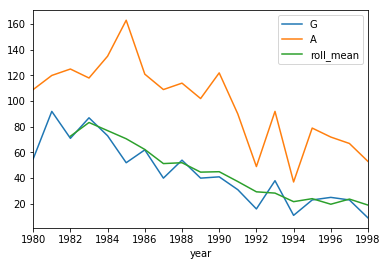

In [97]:
%matplotlib inline
wayne_sums.assign(roll_mean = wayne_sums.rolling(3)['G'].mean()).plot()

In [98]:
quarter_counts = birth_dates.resample('1Q').count()
quarter_counts.rolling(4).sum().head(10)

birthdate
1940Q1    NaN
1940Q2    NaN
1940Q3    NaN
1940Q4    3.0
1941Q1    1.0
1941Q2    1.0
1941Q3    1.0
1941Q4    0.0
1942Q1    1.0
1942Q2    1.0
Freq: Q-DEC, Name: playerID, dtype: float64

In [99]:
quarter_counts.describe()

count    214.000000
mean      21.621495
std       14.381186
min        0.000000
25%        8.000000
50%       22.500000
75%       33.000000
max       60.000000
Name: playerID, dtype: float64

In [100]:
a = quarter_counts.expanding().sum()/ quarter_counts.sum()

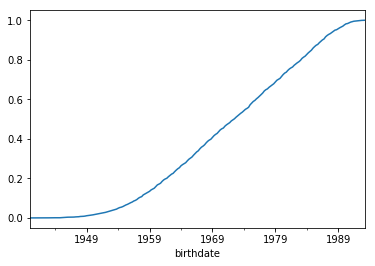

In [101]:
a.plot()

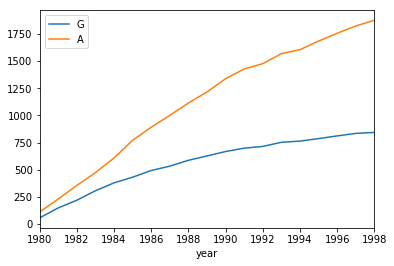

In [102]:
wayne_sums.expanding().sum().plot()

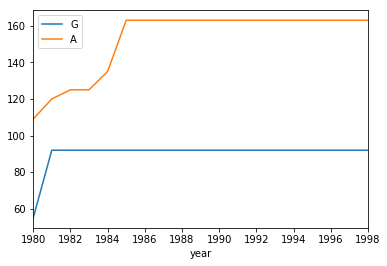

In [103]:
wayne_sums.expanding().max().plot()

In [104]:
totals = wayne_sums.sum()

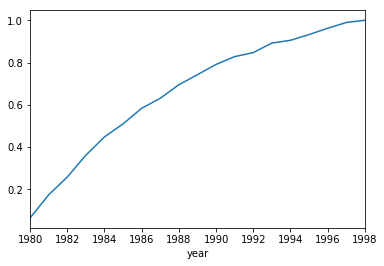

In [105]:
total_part = wayne_sums['G'].expanding().aggregate(lambda x: x.sum()/ totals['G'])
total_part.plot()

## Data viz with Bokeh

In [208]:
teams_split_df = pd.read_csv('./data/TeamSplits.csv')
teams_split_df = recent_nhl(teams_split_df)

In [209]:
teams_split_df.columns

Index(['year', 'lgID', 'tmID', 'hW', 'hL', 'hT', 'hOTL', 'rW', 'rL', 'rT',
       'rOTL', 'SepW', 'SepL', 'SepT', 'SepOL', 'OctW', 'OctL', 'OctT',
       'OctOL', 'NovW', 'NovL', 'NovT', 'NovOL', 'DecW', 'DecL', 'DecT',
       'DecOL', 'JanW', 'JanL', 'JanT', 'JanOL', 'FebW', 'FebL', 'FebT',
       'FebOL', 'MarW', 'MarL', 'MarT', 'MarOL', 'AprW', 'AprL', 'AprT',
       'AprOL'],
      dtype='object')

In [210]:
teams_split_df = teams_split_df.set_index(['year', 'tmID'])

In [211]:
teams_split_df = teams_split_df.filter(regex='^Sep|^Oct|^Nov|^Jan|^Feb|^Mar|^Apr|^May|^Jun|^Jul|^Aug|^Dec', axis=1)

In [212]:
teams_split_df.head()

SepW  SepL  SepT  SepOL  OctW  OctL  OctT  OctOL  NovW  NovL  ...  \
year tmID                                                                ...   
1981 BOS    NaN   NaN   NaN    NaN   6.0   2.0   3.0    NaN   7.0   5.0  ...   
     BUF    NaN   NaN   NaN    NaN   5.0   3.0   3.0    NaN   7.0   2.0  ...   
     CAL    NaN   NaN   NaN    NaN   2.0   7.0   2.0    NaN   5.0   5.0  ...   
     CHI    NaN   NaN   NaN    NaN   3.0   3.0   5.0    NaN   6.0   4.0  ...   
     COR    NaN   NaN   NaN    NaN   2.0   7.0   2.0    NaN   1.0  10.0  ...   

           FebT  FebOL  MarW  MarL  MarT  MarOL  AprW  AprL  AprT  AprOL  
year tmID                                                                 
1981 BOS    1.0    NaN   7.0   5.0   2.0    NaN   2.0   1.0   0.0    NaN  
     BUF    3.0    NaN   5.0   6.0   3.0    NaN   1.0   1.0   0.0    NaN  
     CAL    3.0    NaN   5.0   6.0   2.0    NaN   1.0   1.0   0.0    NaN  
     CHI    0.0    NaN   5.0   6.0   2.0    NaN   2.0   0.0   0.0    NaN  
     COR    3.0    NaN   3.0   8.0   2.0    NaN   1.0   1.0   0.0    NaN  

[5 rows x 32 columns]

In [213]:
months = teams_split_df.columns.map(lambda x: x[:3])
metrics = teams_split_df.columns.map(lambda x: x[3:])
print(months)
print(metrics)

Index(['Sep', 'Sep', 'Sep', 'Sep', 'Oct', 'Oct', 'Oct', 'Oct', 'Nov', 'Nov',
       'Nov', 'Nov', 'Dec', 'Dec', 'Dec', 'Dec', 'Jan', 'Jan', 'Jan', 'Jan',
       'Feb', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Mar', 'Mar', 'Apr', 'Apr',
       'Apr', 'Apr'],
      dtype='object')
Index(['W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L',
       'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T', 'OL', 'W', 'L', 'T',
       'OL', 'W', 'L', 'T', 'OL'],
      dtype='object')


In [214]:
midx = pd.MultiIndex.from_arrays([months, metrics])
teams_split_df.columns = midx
teams_split_df.head()

Sep              Oct                Nov        ...  Feb      Mar  \
            W   L   T  OL    W    L    T  OL    W     L  ...    T  OL    W   
year tmID                                                ...                 
1981 BOS  NaN NaN NaN NaN  6.0  2.0  3.0 NaN  7.0   5.0  ...  1.0 NaN  7.0   
     BUF  NaN NaN NaN NaN  5.0  3.0  3.0 NaN  7.0   2.0  ...  3.0 NaN  5.0   
     CAL  NaN NaN NaN NaN  2.0  7.0  2.0 NaN  5.0   5.0  ...  3.0 NaN  5.0   
     CHI  NaN NaN NaN NaN  3.0  3.0  5.0 NaN  6.0   4.0  ...  0.0 NaN  5.0   
     COR  NaN NaN NaN NaN  2.0  7.0  2.0 NaN  1.0  10.0  ...  3.0 NaN  3.0   

                         Apr                
             L    T  OL    W    L    T  OL  
year tmID                                   
1981 BOS   5.0  2.0 NaN  2.0  1.0  0.0 NaN  
     BUF   6.0  3.0 NaN  1.0  1.0  0.0 NaN  
     CAL   6.0  2.0 NaN  1.0  1.0  0.0 NaN  
     CHI   6.0  2.0 NaN  2.0  0.0  0.0 NaN  
     COR   8.0  2.0 NaN  1.0  1.0  0.0 NaN  

[5 rows x 32 columns]

In [215]:
teams_split_df = teams_split_df.stack(level=0)

In [216]:
teams_split_df.index.levels[2]

Index(['Apr', 'Dec', 'Feb', 'Jan', 'Mar', 'Nov', 'Oct', 'Sep'], dtype='object')

In [217]:
teams_split_df = teams_split_df.swaplevel(1, 2)

In [218]:
teams_split_df = teams_split_df.reorder_levels([2, 0,1])


In [219]:
teams_split_df.index.levels[2].name = 'month'
teams_split_df.head()

L  OL    T    W
tmID year month                   
BOS  1981 Apr    1.0 NaN  0.0  2.0
          Dec    3.0 NaN  0.0  9.0
          Feb    5.0 NaN  1.0  5.0
          Jan    6.0 NaN  3.0  7.0
          Mar    5.0 NaN  2.0  7.0

In [227]:
teams_df.columns

Index(['year', 'tmID', 'name'], dtype='object')

In [228]:
teams_g = teams_df.groupby(['tmID', 'name']).sum()

In [237]:
teams_g = teams_g.loc[~teams_g.duplicated(keep='first')].drop(columns ='year')

In [238]:
teams_split_df = teams_split_df.reset_index()
teams_g = teams_g.reset_index()

In [242]:
teams_split_df = pd.merge(left=teams_split_df,
         right=teams_g,
         left_on='tmID',
         right_on='tmID'
)

In [244]:
teams_split_df = teams_split_df.drop(columns='tmID')

In [257]:
score_df = score_df.filter(regex='.*(?<!_y)$')

In [296]:
ducks = teams_split_df.loc[teams_split_df.name =='Anaheim Ducks']
ducks.head()

,index,year,month,L,OL,T,W,name
2239,4026,2006,Apr,0.0,2.0,NaN,1.0,Anaheim Ducks
2240,4027,2006,Dec,5.0,0.0,NaN,9.0,Anaheim Ducks
2241,4028,2006,Feb,5.0,2.0,NaN,5.0,Anaheim Ducks
2242,4029,2006,Jan,5.0,2.0,NaN,4.0,Anaheim Ducks
2243,4030,2006,Mar,3.0,2.0,NaN,10.0,Anaheim Ducks


In [264]:
import calendar
cal = {v: k for k,v in enumerate(calendar.month_abbr)}

In [276]:
cal_df = pd.DataFrame.from_dict(cal, orient='index')

In [291]:
cal_df.columns = ['month_nbr']

In [297]:
ducks = ducks.join(cal_df, on='month')
ducks = ducks.loc[:, ['year', 'month_nbr', 'L', 'OL', 'T', 'W', 'name']]

In [299]:
# Create index with year and month
ducks = ducks.assign(date = pd.to_datetime({'year': ducks.year,
                                            'month': ducks.month_nbr,
                                            'day': 1}))
# ducks.head()
                                

In [305]:
ducks = ducks.set_index('date').to_period('m')

In [308]:
ducks = ducks.drop(columns=['year', 'month_nbr'])

In [315]:
ducks = ducks[['name','L', 'OL', 'T', 'W' ]]
ducks = ducks.sort_index()

In [316]:
ducks.head()

,name,L,OL,T,W
date,,,,,
2006-01,Anaheim Ducks,5.0,2.0,NaN,4.0
2006-02,Anaheim Ducks,5.0,2.0,NaN,5.0
2006-03,Anaheim Ducks,3.0,2.0,NaN,10.0
2006-04,Anaheim Ducks,0.0,2.0,NaN,1.0
2006-10,Anaheim Ducks,0.0,3.0,NaN,9.0


In [327]:
ducks.index = ducks.to_timestamp().index.map(lambda x: x + pd.DateOffset(years=1) if x.month <5 else x) # reassign the year for the first months
ducks = ducks.sort_index()

,name,L,OL,T,W
date,,,,,
2006-10-01,Anaheim Ducks,0.0,3.0,NaN,9.0
2006-11-01,Anaheim Ducks,2.0,3.0,NaN,10.0
2006-12-01,Anaheim Ducks,5.0,0.0,NaN,9.0
2007-01-01,Anaheim Ducks,5.0,2.0,NaN,4.0
2007-02-01,Anaheim Ducks,5.0,2.0,NaN,5.0


In [328]:
resampler = ducks.resample("A-JUN")
resampler.sum()

,L,OL,T,W
date,,,,
2007-06-30,20.0,14.0,0.0,48.0
2008-06-30,27.0,8.0,0.0,47.0
2009-06-30,33.0,7.0,0.0,42.0
2010-06-30,32.0,11.0,0.0,39.0
2011-06-30,30.0,5.0,0.0,47.0
2012-06-30,36.0,12.0,0.0,34.0


In [336]:
# for each x that corresponds a season, reset index as expanding window does not work on index, obtain columns WL and 
# calculate the expanding  sum
res = resampler.apply(lambda x: x.reset_index()[['W', 'L']].expanding().sum())
res.index = ducks.index 
res.head()

,W,L
date,,
2006-10-01,9.0,0.0
2006-11-01,19.0,2.0
2006-12-01,28.0,7.0
2007-01-01,32.0,12.0
2007-02-01,37.0,17.0


In [338]:
final = res.asfreq(pd.tseries.offsets.MonthBegin())
final.head(10)

,W,L
date,,
2006-10-01,9.0,0.0
2006-11-01,19.0,2.0
2006-12-01,28.0,7.0
2007-01-01,32.0,12.0
2007-02-01,37.0,17.0
2007-03-01,47.0,20.0
2007-04-01,48.0,20.0
2007-05-01,NaN,NaN
2007-06-01,NaN,NaN


In [339]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [340]:
from bokeh.models.sources import ColumnDataSource as cds

In [341]:
final.head()

Index(['W', 'L'], dtype='object')

In [353]:
final = final.reset_index()


In [371]:
final['month'] = final['date'].dt.to_period('m')
final.head()

,date,W,L,month
0,2006-10-01,9.0,0.0,2006-10
1,2006-11-01,19.0,2.0,2006-11
2,2006-12-01,28.0,7.0,2006-12
3,2007-01-01,32.0,12.0,2007-01
4,2007-02-01,37.0,17.0,2007-02


In [374]:
source = cds(final)
p = figure(x_axis_type="datetime", height=500, width=800)
p.line(source=source, x='month', y='W', color='green', legend='Wins')
p.line(source=source, x='month', y='L', color='red', legend='Losses')
show(p)

In [387]:
a = pd.read_csv('./Book1.csv')

In [389]:
a=a.set_index('CON_ID')

In [405]:
a['AMT'] = pd.to_numeric(a['AMT'].str.slice(2,).map(lambda x: x.replace(' ', '').replace(',', '')))

In [409]:
a.START_DATE = pd.to_datetime(arg=a.START_DATE, format='%m/%d/%y')
a.head()

,AMT,START_DATE
CON_ID,,
1,653196.0,2013-06-21
2,899939.0,2010-12-02
3,650069.0,2010-11-13
4,735999.0,2007-01-04
5,29429.0,2018-07-23


In [414]:
a = a.reset_index().set_index('START_DATE')

In [417]:
a.index = a.index.to_period('m')

In [424]:
a.columns

Index(['CON_ID', 'AMT'], dtype='object')

In [427]:
a = a.sort_index()
a = a.resample('1Q').agg({'CON_ID' : ['count'], 'AMT' : ['sum']})

In [432]:
b  = a.expanding().sum()
b = b.reset_index()
b.head()

,START_DATE,CON_ID,AMT
,,count,sum
0,2005Q4,76.0,40888922.0
1,2006Q1,149.0,76581672.0
2,2006Q2,234.0,120711870.0
3,2006Q3,305.0,154432888.0
4,2006Q4,361.0,184492077.0


In [436]:
b.columns = ['START_DATE', 'CON_ID', 'AMT']

In [437]:
source = cds(b)
p = figure(x_axis_type="datetime", height=500, width=800)
p.line(source=source, x='START_DATE', y='CON_ID', color='green', legend='Wins')
# p.line(source=source, x='month', y='L', color='red', legend='Losses')
show(p)